In [29]:
from ingestion import make_cleaned
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plan
- Distributions of target
- Boxplot of Lot Area
- Pairplot of SalePrice, Lot Area, FullBath + HalfBath, GrLivArea, GarageCars
- Mean price by Neighborhood, OverallQual
- Clustering
- Summary statistics

In [30]:
pd.set_option('display.max.columns',99)
clean = make_cleaned()
clean

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,2,2,CBlock,2.0,Gd,BLQ,639.0,Unf,0,441,1080.0,GasA,1,Y,SBrkr,1656,0,0,1656,1.0,1,0,3,2,7,Typ,2,3.0,Attchd,1960.0,Fin,2.0,528.0,P,210,62,0,0,0,0,2.0,MnPrv,Shed,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,CBlock,2.0,No,Rec,468.0,LwQ,144,270,882.0,GasA,2,Y,SBrkr,896,0,0,896,0.0,1,0,2,2,5,Typ,0,2.0,Attchd,1961.0,Unf,1.0,730.0,Y,140,0,0,0,120,0,2.0,MnPrv,Shed,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,2,2,CBlock,2.0,No,ALQ,923.0,Unf,0,406,1329.0,GasA,2,Y,SBrkr,1329,0,0,1329,0.0,1,1,3,3,6,Typ,0,1.666667,Attchd,1958.0,Unf,1.0,312.0,Y,393,36,0,0,0,0,2.0,MnPrv,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,3,2,CBlock,2.0,No,ALQ,1065.0,Unf,0,1045,2110.0,GasA,4,Y,SBrkr,2110,0,0,2110,1.0,2,1,3,4,8,Typ,2,2.0,Attchd,1968.0,Fin,2.0,522.0,Y,0,0,0,0,0,0,2.0,MnPrv,Shed,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,3.0,No,GLQ,791.0,Unf,0,137,928.0,GasA,3,Y,SBrkr,928,701,0,1629,0.0,2,1,3,2,6,Typ,1,2.0,Attchd,1997.0,Fin,2.0,482.0,Y,212,34,0,0,0,0,2.0,MnPrv,Shed,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,2,2,CBlock,2.0,Av,GLQ,819.0,Unf,0,184,1003.0,GasA,2,Y,SBrkr,1003,0,0,1003,1.0,1,0,3,2,6,Typ,0,2.333333,Detchd,1984.0,Unf,2.0,588.0,Y,120,0,0,0,0,0,3.0,GdPrv,Shed,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,65.333333,8885,Pave,Grvl,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,2,2,CBlock,3.0,Av,BLQ,301.0,ALQ,324,239,864.0,GasA,2,Y,SBrkr,902,0,0,902,1.0,1,0,2,2,5,Typ,0,2.333333,Attchd,1983.0,Unf,2.0,484.0,Y,164,0,0,0,0,0,3.0,MnPrv,Shed,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,2,2,PConc,3.0,Av,GLQ,337.0,Unf,0,575,912.0,GasA,2,Y,SBrkr,970,0,0,970,0.0,1,0,3,2,6,Typ,0,2.333333,Attchd,1992.666667,Unf,0.0,0.0,Y,80,32,0,0,0,0,3.0,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,Grvl,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,2,2,CBlock,3.0,Av,

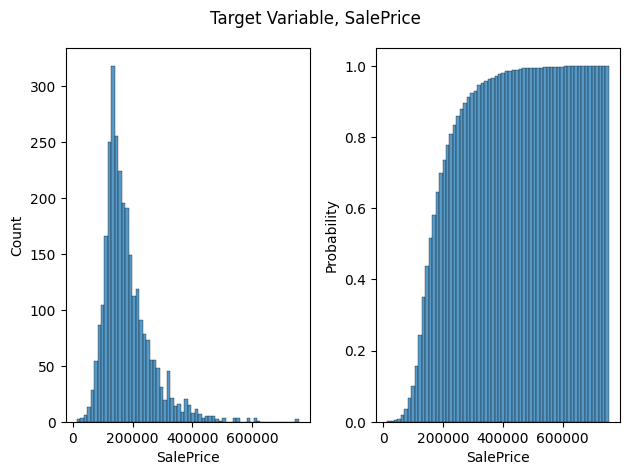

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
sns.histplot(clean.SalePrice,ax=ax1)
sns.histplot(clean.SalePrice,cumulative=True,stat='probability',ax=ax2)
plt.suptitle("Target Variable, SalePrice")
plt.tight_layout()

Text(0.5, 1.0, 'Boxplot of Total Lot Area')

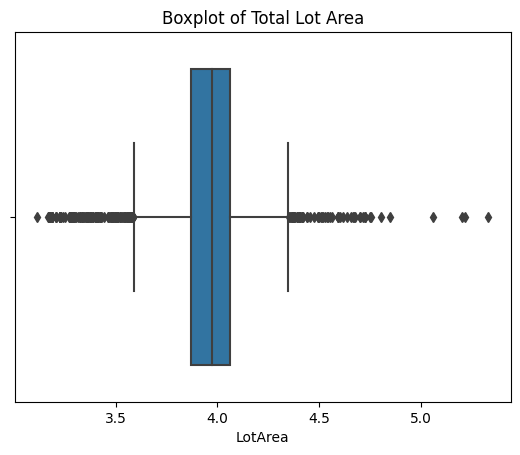

In [34]:
sns.boxplot(x=np.log10(clean.LotArea))
plt.title("Boxplot of Total Lot Area")

In [38]:
# Examine largest lots. No clear indication of bad data. 
# Only instance eligible for removal would be 956.
clean[clean.LotArea>=10**5]

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
956,957,916176125,20,RL,150.0,215245,Pave,Grvl,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,2,2,CBlock,3.0,Gd,ALQ,1236.0,Rec,820,80,2136.0,GasW,2,Y,SBrkr,2036,0,0,2036,2.0,2,0,3,2,8,Typ,2,3.0,Attchd,1965.0,RFn,2.0,513.0,Y,0,0,0,0,0,0,3.0,MnPrv,Shed,0,6,2009,WD,Normal,375000
1570,1571,916125425,190,RL,79.333333,164660,Grvl,Grvl,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,2,2,CBlock,2.0,Gd,ALQ,1249.0,BLQ,147,103,1499.0,GasA,4,Y,SBrkr,1619,167,0,1786,2.0,2,0,3,2,7,Typ,2,3.0,Attchd,1965.0,Fin,2.0,529.0,Y,670,0,0,0,0,0,3.0,MnPrv,Shed,700,8,2008,WD,Normal,228950
2071,2072,905301050,20,RL,78.666667,115149,Pave,Grvl,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,2,2,CBlock,3.0,Gd,GLQ,1219.0,Unf,0,424,1643.0,GasA,2,Y,SBrkr,1824,0,0,1824,1.0,2,0,2,3,5,Typ,2,2.0,Attchd,1971.0,Unf,2.0,739.0,Y,380,48,0,0,0,0,2.666667,MnPrv,Shed,0,6,2007,WD,Normal,302000
2115,2116,906426060,50,RL,98.333333,159000,Pave,Grvl,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,3,2,CBlock,3.0,Gd,Rec,697.0,Unf,0,747,1444.0,GasA,3,Y,SBrkr,1444,700,0,2144,0.0,2,0,4,3,7,Typ,2,2.0,Attchd,1958.0,Fin,2.0,389.0,Y,0,98,0,0,0,0,2.666667,MnPrv,Shed,500,6,2007,WD,Normal,277000


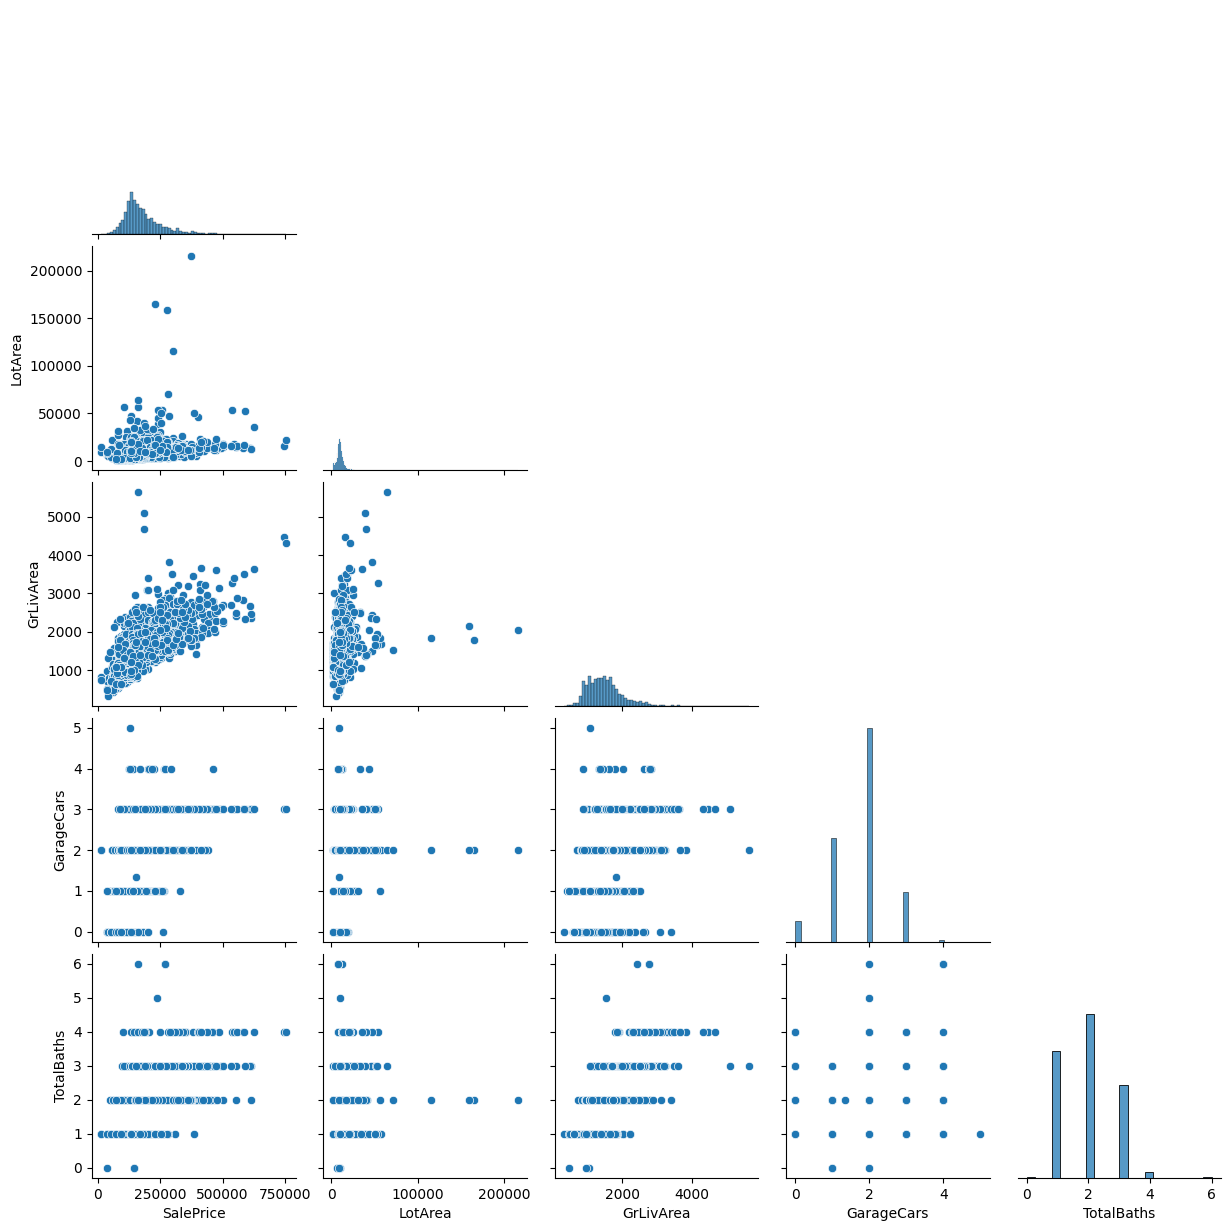

In [49]:
# Pairplot of SalePrice, Lot Area, FullBath + HalfBath, GrLivArea, GarageCars
clean["TotalBaths"] = clean.HalfBath + clean.FullBath
sns.pairplot(data=clean[["SalePrice","LotArea", "GrLivArea","GarageCars","TotalBaths"]],corner=True)

In [69]:
# Mean price by OverallCond, OverallQual, Neighborhood

In [68]:
clean[["SalePrice","Neighborhood","OverallCond","OverallQual"]].groupby("OverallCond").mean()

,SalePrice,OverallQual
OverallCond,,
1,69981.285714,3.428571
2,116062.1,4.4
3,95994.0,4.4
4,120923.871287,4.633663
5,206027.027207,6.611245
6,150377.88743,5.517824
7,153001.95641,5.471795
8,154775.520833,5.694444
9,199765.853659,6.634146


Text(0.5, 1.0, 'Sale Price By Overall Quality of Materials and Finish')

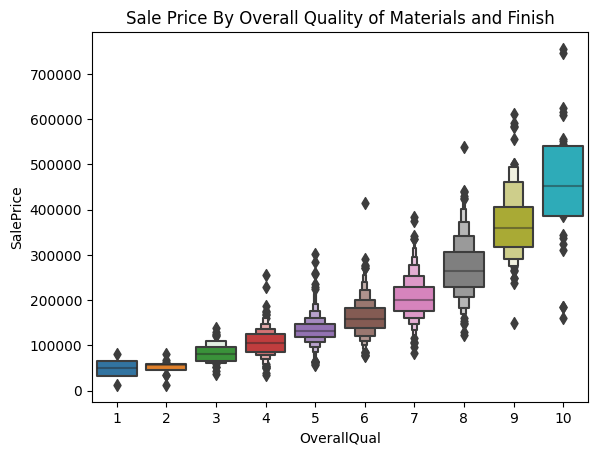

In [74]:
sns.boxenplot(x=clean.OverallQual,y=clean.SalePrice)
plt.title("Sale Price By Overall Quality of Materials and Finish")

Text(0.5, 1.0, 'Sale Price By Overall Condition of Home')

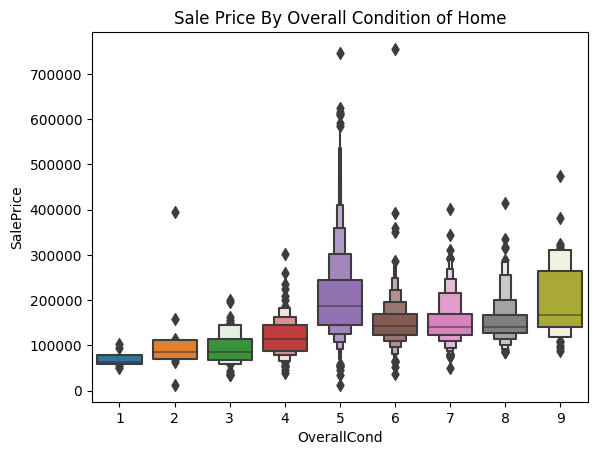

In [75]:
sns.boxenplot(x=clean.OverallCond,y=clean.SalePrice)
plt.title("Sale Price By Overall Condition of Home")

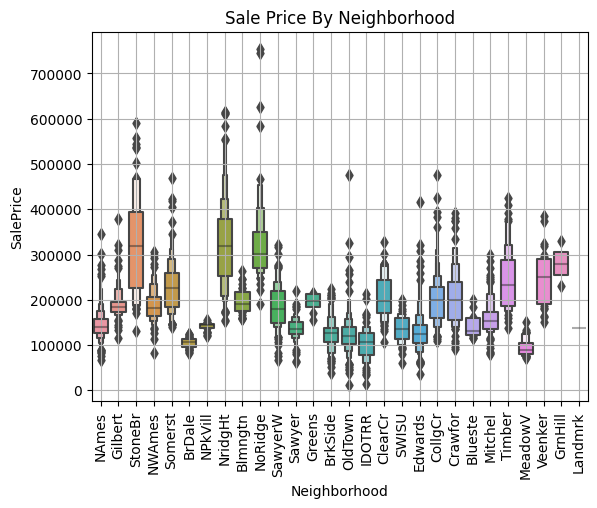

In [82]:
sns.boxenplot(x=clean.Neighborhood,y=clean.SalePrice)
plt.title("Sale Price By Neighborhood")
plt.xticks(rotation=90)
plt.grid(True)

In [ ]:
# StoneBr, NridgHt, NoRidge are most expensive areas